## Моделирование молекулярной динамики

   - Система: ГЦК решётка $7\times7\times7$ частиц;
   - Постоянная решётки: $a = 1.75~\sigma $;
   - Потенциал взаимодействия: Леннард-Джонс;
   - Начальная температура: $T_i = 2.8~\varepsilon / k_B$;
   - Конечная температура: $T_f = 2.8~\varepsilon / k_B$;
   - Начальное давление: $P_i \approx 4.5~\varepsilon / \sigma^3$;
   - Конечное давление: $P_f = 22~\varepsilon / \sigma^3$;
   - Скорость охлаждения: $v_T = 0.02~\varepsilon / k_B\tau$;
   - Баростат: MTK;
   - Толщина сферического слоя (список Верле): $\Delta r_s = 0.3~\sigma $;
   - Временной шаг: $\Delta t = 0.005~\tau$;
   - Число шагов для охлаждения: 5000;
   - Функция радиального распределения, среднеквадратичное смещение и коэффициенты самодиффузии рассчитывалась через каждые 500 шагов;
   - Подсчёт состоял из 2499 шагов: 500 на уравновешивание системы при фиксированной температуре и 1999 на усреднение по ансамблям (к первому ансамблю относятся шаги с 1 по 1000 шаг, ко второму - с 2 по 1001 и т.д.);
   - Функция радиального распределения вычислялась как среднее по времени за первые 1000 шагов;

#### Импорт необходимых библиотек

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = [i / 2.54 for i in (15, 15)]
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times New Roman'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.labelsize'] = 14

#### Путь к файлам с данными

In [3]:
BASE_DIRECTORY = os.path.dirname(os.getcwd())
PATH_TO_ALL_DATA = os.path.join(BASE_DIRECTORY, 'data')
PATH_TO_ALL_PLOTS = os.path.join(BASE_DIRECTORY, 'plots')
CURRENT_DATA = '2021-01-27'

PATH_TO_CURRENT_DATA = os.path.join(PATH_TO_ALL_DATA, CURRENT_DATA)
PATH_TO_CURRENT_PLOTS = os.path.join(PATH_TO_ALL_PLOTS, CURRENT_DATA)

try:
    os.mkdir(PATH_TO_CURRENT_PLOTS)
except FileExistsError:
    pass

In [4]:
rdf_filename = os.path.join(PATH_TO_CURRENT_DATA, 'rdf_T_')
static_structure_filename =  os.path.join(PATH_TO_CURRENT_DATA, 'static_structure_factor_T_')
transport_filename = os.path.join(PATH_TO_CURRENT_DATA, 'transport_T_')
parameters_filename = os.path.join(PATH_TO_CURRENT_DATA, 'system_parameters.csv')

In [5]:
plot_filename_postfix = 'cooling'

In [6]:
def save_plot(filename):
    plt.savefig(
        os.path.join(PATH_TO_CURRENT_PLOTS, filename)
    )

#### Температуры, для которых была подчитана функция радиального распределения

In [7]:
temperatures = (
    2.82893,
    4.45598,
    3.42171,
    3.05525,
    2.95426,
    2.87954,
    2.85544,
    2.77722,
    2.78036,
    2.74993,
    2.82691,
)

isotherm_times = np.arange(len(temperatures)) * 2.5
temperatures = list(temperatures[:6]) + [temperatures[7]]
isotherm_times = np.array(list(isotherm_times[:6]) + [isotherm_times[7]])

colors = (
    'black',
    'red',
    'green',
    'blue',
    'purple',
    'orange',
    'olive',
)

#### Извлечение значений функции радиального распределения из файлов

In [8]:
rdf_data = pd.DataFrame(columns=['radius'])
# static_structure_data = pd.DataFrame(columns=['wave_number'])
msd_data = pd.DataFrame(columns=['time'])
vel_autocor_data = pd.DataFrame(columns=['time'])
einstein_diffusion_data = pd.DataFrame(columns=['time'])
green_kubo_diffusion_data = pd.DataFrame(columns=['time'])

for temperature in temperatures:
    df = pd.read_csv(
        f'{rdf_filename}{temperature:.5f}.csv',
        sep=';',
    )
    rdf_data = rdf_data.merge(
        right=df,
        how='outer',
        on='radius',
    )
#     df = pd.read_csv(
#         f'{static_structure_filename}{temperature:.5f}.csv',
#         sep=';',
#     )
#     static_structure_data = static_structure_data.merge(
#         right=df,
#         how='outer',
#         on='static_structure_factor',
#     )
    df = pd.read_csv(
        f'{transport_filename}{temperature:.5f}.csv',
        sep=';',
    )
    msd_data = msd_data.merge(
        right=df[['time', 'msd']],
        how='outer',
        on='time',
    )
    vel_autocor_data = vel_autocor_data.merge(
        right=df[['time', 'velocity_autocorrelation']],
        how='outer',
        on='time',
    )
    einstein_diffusion_data = einstein_diffusion_data.merge(
        right=df[['time', 'einstein_diffusion']],
        how='outer',
        on='time',
    )
    green_kubo_diffusion_data = green_kubo_diffusion_data.merge(
        right=df[['time', 'green_kubo_diffusion']],
        how='outer',
        on='time',
    )
    rdf_data = rdf_data.rename(columns={'rdf': f'{temperature:.5f}'})
#     static_structure_data = static_structure_data.rename(columns={'static_structure_factor': f'{temperature:.5f}'})
    msd_data = msd_data.rename(columns={'msd': f'{temperature:.5f}'})
    vel_autocor_data = vel_autocor_data.rename(columns={'velocity_autocorrelation': f'{temperature:.5f}'})
    einstein_diffusion_data = einstein_diffusion_data.rename(columns={'einstein_diffusion': f'{temperature:.5f}'})
    green_kubo_diffusion_data = green_kubo_diffusion_data.rename(columns={'green_kubo_diffusion': f'{temperature:.5f}'})

msd_data

,time,2.82893,4.45598,3.42171,3.05525,2.95426,2.87954,2.77722
0,0.005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.010,0.000220,0.000336,0.000259,0.000231,0.000223,0.000217,0.000210
2,0.015,0.000878,0.001333,0.001029,0.000918,0.000884,0.000862,0.000834
3,0.020,0.001966,0.002959,0.002284,0.002036,0.001961,0.001913,0.001851
4,0.025,0.003471,0.005165,0.003985,0.003552,0.003420,0.003336,0.003228
...,...,...,...,...,...,...,...,...
995,4.980,6.855480,4.010900,2.219019,1.608098,1.475287,1.491461,1.336747
996,4.985,6.862461,4.014867,2.221312,1.609687,1.476808,1.492999,1.338086
997,4.990,6.869449,4.018833,2.223611,1.611277,1.478333,1.494534,1.339425
998,4.995,6.876433,4.022801,2.225909,1.612866,1.479859,1.496070,1.340763


#### Графики функций радиального распределения $g(\textbf{r})$ при различных температурах

$$g(\textbf{r})=\dfrac{V}{N^2}\left<\sum_{i}{\sum_{j\ne i}{\delta(\textbf{r}-\textbf{r}_{ij})}}\right>$$

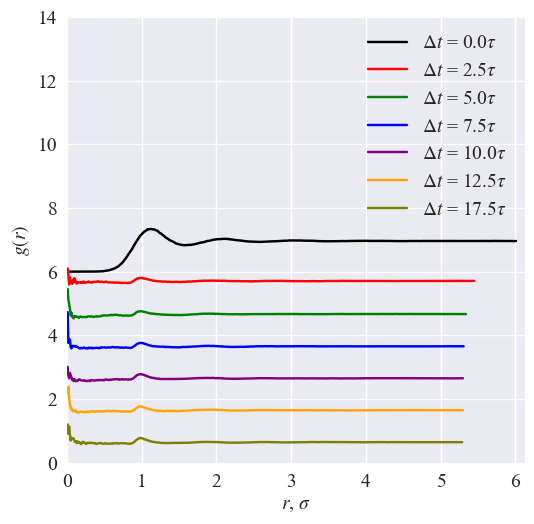

In [27]:
wendt_abraham_parameter = []
plt.rcParams['font.size'] = 14
for i, temperature in enumerate(temperatures):
    current_rdf = rdf_data[f'{temperature:.5f}']
    g_max = current_rdf.max()
    r_max = current_rdf.argmax()
    g_min = rdf_data.loc[
        (rdf_data['radius'] > rdf_data['radius'][r_max])
        & (rdf_data['radius'] < 2), 
        f'{temperature:.5f}'
    ].min()
    wendt_abraham_parameter.append(g_min / g_max)
    plt.plot(
        rdf_data['radius'],
        rdf_data[f'{temperature:.5f}'] + 1 * (len(temperatures) - (i + 1)), 
#         label=f'T = {temperature:.1f} $\epsilon / k_B $',
        label=fr'$\Delta t$ = {isotherm_times[i]:.1f}$\tau$',
        color=colors[i],
    );
    
plt.xlabel('$r$, $\sigma$');
plt.ylabel('$g(r)$');
plt.xlim(
    left=0, 
    right=6.125,
);
plt.ylim(
    bottom=0, 
    top=14,
);
plt.legend();

save_plot(f'rdf_{plot_filename_postfix}.png')

In [10]:
# plt.rcParams['font.size'] = 14
# for i, temperature in enumerate(temperatures):
#     current_ssf = static_structure_data[f'{temperature:.5f}']
#     plt.plot(
#         static_structure_data['wave_number'],
#         static_structure_data[f'{temperature:.5f}'] + 1 * (len(temperatures) - (i + 1)), 
#         label=f'T = {temperature:.1f} $\epsilon / k_B $',
#     );
    
# plt.xlabel('$k$, $rad / \sigma$');
# plt.ylabel('$S(k)$');
# plt.xlim(
#     left=0, 
#     right=6.125,
# );
# plt.ylim(
#     bottom=0, 
#     top=16,
# );
# plt.legend();

# save_plot(f'ssf_{plot_filename_postfix}.png')

In [11]:
wendt_abraham_parameter

[0.6181383480373104,
 0.5445387787147389,
 0.3649216471096057,
 0.3386728085456674,
 0.5535560533629487,
 0.417640224577956,
 0.48606715707336157]

#### Зависимость параметра Вендта-Абрахама от температуры. Определение температуры стеклования

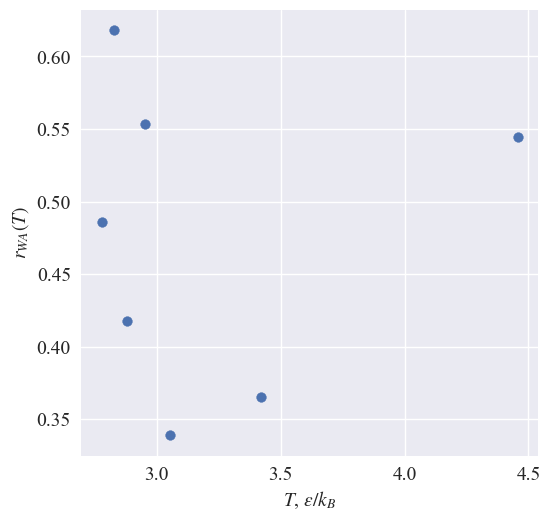

In [12]:
plt.rcParams['font.size'] = 14
plt.scatter(
    temperatures,
    wendt_abraham_parameter, 
);
plt.xlabel('$T$, $\epsilon / k_B $');
plt.ylabel('$r_{WA}(T)$');

save_plot(f'rdf_{plot_filename_postfix}.png')

#### Временная зависимость среднеквадратичного смещения $\left<\Delta r^2(t)\right>$ при различных температурах

$$\left<\Delta r^2(t)\right>=\dfrac{1}{N}\sum_{i=1}^{N}{\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2}$$

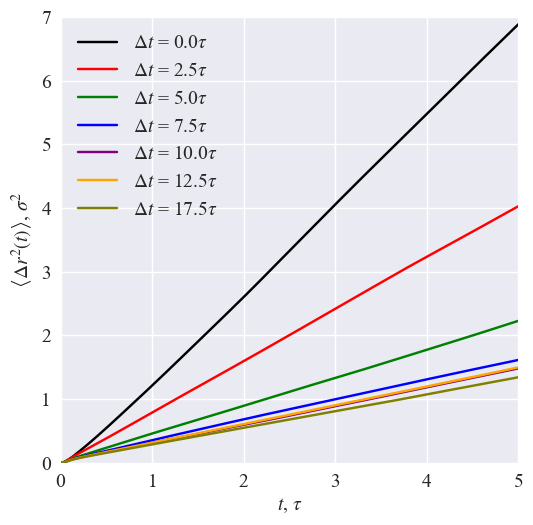

In [13]:
for i, temperature in enumerate(temperatures):
    plt.plot(
        msd_data['time'],
        msd_data[f'{temperature:.5f}'], 
#         label=f'T = {temperature:.1f} $\epsilon / k_B $',
        label=fr'$\Delta t$ = {isotherm_times[i]:.1f}$\tau$',
        color=colors[i],
    );
    
plt.xlabel(r'$t$, $\tau $');
plt.ylabel(r'$\left<\Delta r^2(t)\right>$, $\sigma^2$');
plt.xlim(
    left=0, 
    right=5,
);
plt.ylim(
    bottom=0, 
    top=7,
);
plt.legend();

save_plot(f'msd_{plot_filename_postfix}.png')

#### Временная зависимость автокорреляционнной функции скорости $\Psi(t)$ при различных температурах

$$\Psi(t) = \dfrac{1}{N}\left<\sum_{j=1}^N{\vec{v}_j(t)\vec{v}_j(0)}\right>$$

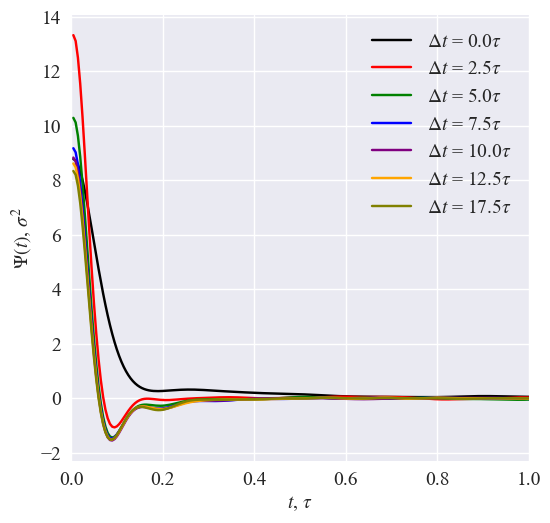

In [14]:
for i, temperature in enumerate(temperatures):
    plt.plot(
        vel_autocor_data['time'],
        vel_autocor_data[f'{temperature:.5f}'], 
#         label=f'T = {temperature:.1f} $\epsilon / k_B $',
        label=fr'$\Delta t$ = {isotherm_times[i]:.1f}$\tau$',
        color=colors[i],
    );
    
plt.xlabel(r'$t$, $\tau $');
plt.ylabel(r'$\Psi(t)$, $\sigma^2$');
plt.xlim(
    left=0, 
    right=1,
);
plt.ylim(
#     bottom=0, 
#     top=20,
);
plt.legend();

save_plot(f'vel_autocorr_{plot_filename_postfix}.png')

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Эйнштейна, при различных температурах

$$D_E(t)=\dfrac{\left<\left<\Delta r^2\right>\right>}{6t}=\dfrac{1}{6tN}\left<\sum_{i=1}^{N}\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2\right>$$

$$D=\lim_{t\rightarrow\infty}{D_E(t)}$$

In [15]:
einstein_diffusion = np.zeros(len(temperatures), dtype=np.float)
green_kubo_diffusion = np.zeros(len(temperatures), dtype=np.float)

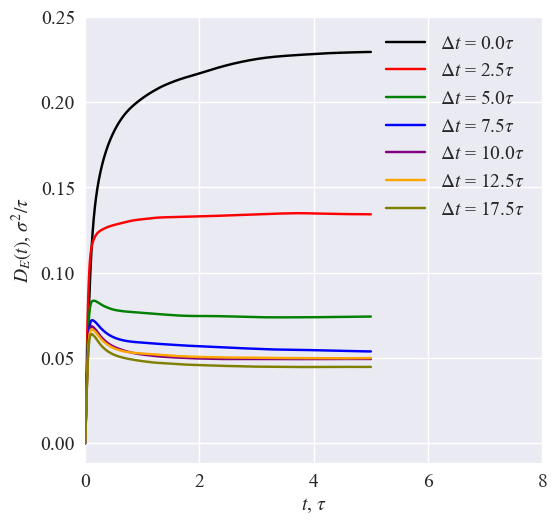

In [16]:
for i, temperature in enumerate(temperatures):
    diff_data = einstein_diffusion_data[f'{temperature:.5f}'].values
    plt.plot(
        einstein_diffusion_data['time'].values,
        diff_data, 
        label=fr'$\Delta t$ = {isotherm_times[i]:.1f}$\tau$',
        color=colors[i],
    );
    einstein_diffusion[i] = diff_data[-1]
    
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'$D_E(t)$, $\sigma^2 / \tau$');
plt.xlim(
    left=0, 
    right=8,
);
plt.ylim(
#     bottom=0, 
    top=0.25,
);
plt.legend();

save_plot(f'diffusion_einstein_{plot_filename_postfix}.png')

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Грина-Кубо, при различных температурах

$$D_{GK}(t)=\dfrac{1}{3}\int_{0}^{t}{\Psi(\tau)d\tau}=\dfrac{1}{3N}\int_{0}^{t}{\left<\sum_{j=1}^N{\vec{v}_j(\tau)\vec{v}_j(0)}\right>d\tau}$$

$$D=\lim_{t\rightarrow\infty}{D_{GK}(t)}$$

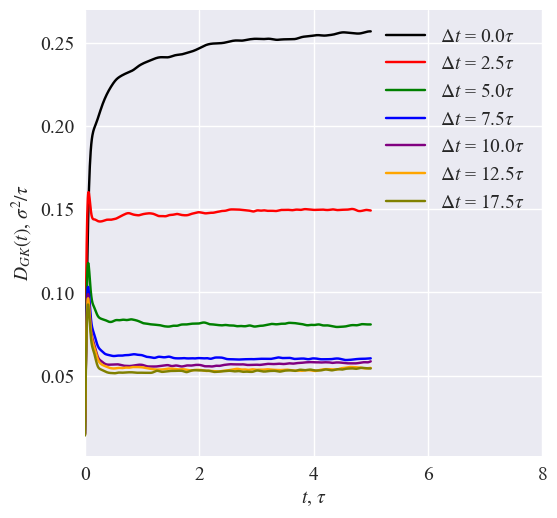

In [17]:
for i, temperature in enumerate(temperatures):
    diff_data = green_kubo_diffusion_data[f'{temperature:.5f}'].values
    plt.plot(
        green_kubo_diffusion_data['time'].values,
        diff_data, 
        label=fr'$\Delta t$ = {isotherm_times[i]:.1f}$\tau$',
        color=colors[i],
    );
    green_kubo_diffusion[i] = diff_data[-1]
    
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'$D_{GK}(t)$, $\sigma^2 / \tau$');
plt.xlim(
    left=0, 
    right=8,
);
plt.ylim(
#     bottom=0, 
    top=0.27,
);
plt.legend();

save_plot(f'diffusion_green_kubo_{plot_filename_postfix}.png')

#### Сравнение коэффициентов самодиффузии, вычисленных через соотношения Эйнштейна и Грина-Кубо

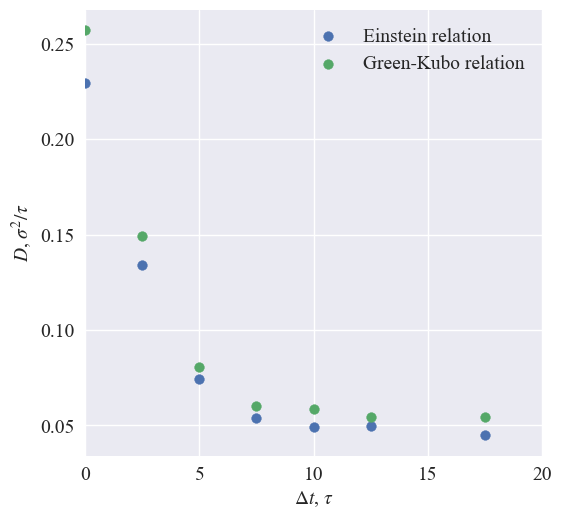

In [18]:
plt.scatter(
    isotherm_times,
    einstein_diffusion, 
    label='Einstein relation',
);
plt.scatter(
    isotherm_times,
    green_kubo_diffusion, 
    label='Green-Kubo relation',
); 
plt.xlabel(r'$\Delta t$, $\tau$');
plt.ylabel(r'$D$, $\sigma^2 / \tau$');
plt.xlim(
    left=0, 
    right=20,
);
plt.ylim(
#     bottom=0, 
#     top=0.1,
);
plt.legend(markerscale=1);


save_plot(f'diffusion_comparing_{plot_filename_postfix}.png')

#### Извлечение параметров системы из файла

In [19]:
system_parameters = pd.read_csv(parameters_filename, sep=';')

for column in system_parameters.columns:
    system_parameters[column] = system_parameters[column].round(5)

system_parameters

,temperature,pressure,system_kinetic_energy,potential_energy,total_energy,virial,msd,diffusion
0,2.81588,5.41484,5821.9470,-4462.2530,1359.6938,18013.654,0.00021,0.00703
1,2.86893,6.74981,6014.4404,-3577.5874,2436.8530,24731.230,0.00085,0.01415
2,3.03235,8.46399,6566.7220,-2504.8086,4061.9138,32723.717,0.00193,0.02145
3,3.44381,10.03463,7688.7246,-1718.1257,5970.5986,38740.836,0.00350,0.02921
4,4.14296,11.12525,9300.6490,-1454.2571,7846.3926,41157.555,0.00567,0.03779
...,...,...,...,...,...,...,...,...
4995,2.78967,22.11242,5679.1020,-3253.8430,2425.2590,67338.640,14.39496,0.09604
4996,2.77891,22.11795,5671.3667,-3246.8710,2424.4958,67375.810,14.39551,0.09603
4997,2.78327,22.07132,5700.5405,-3278.4124,2422.1282,67153.580,14.39704,0.09602
4998,2.80661,21.98540,5759.1274,-3340.2260,2418.9014,66731.890,14.39956,0.09602


In [20]:
times = (system_parameters.index + 1) * 0.005

#### Зависимость температуры системы от времени

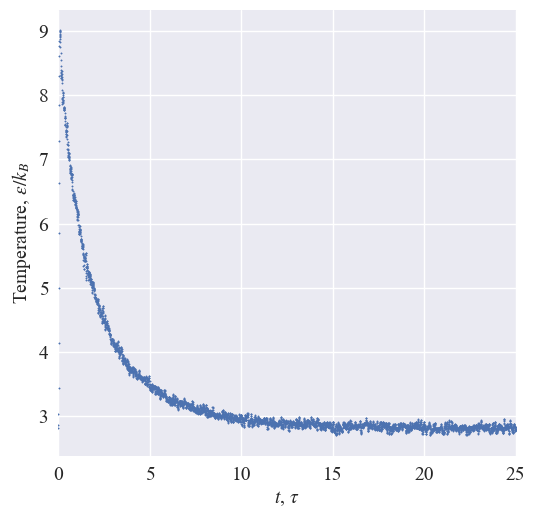

In [21]:
plt.scatter(
    times,
    system_parameters['temperature'],
    s=1,
);
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Temperature, $\epsilon / k_B$');

plt.xlim(
    left=0,
    right=25,
);
plt.ylim(
#     bottom=2.75,
#     top=5,
);

save_plot(f'temperature_{plot_filename_postfix}.png')

#### Зависимость давления системы от времени

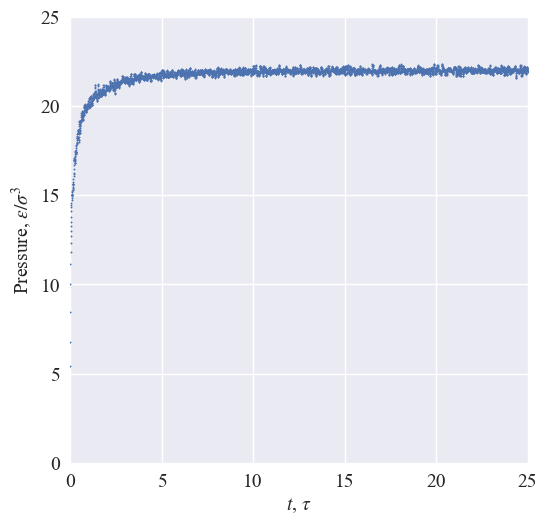

In [22]:
plt.scatter(
    times,
    system_parameters['pressure'],
    s=1,
);
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Pressure, $\epsilon / \sigma^3 $');

plt.xlim(
    left=0,
    right=25,
);
plt.ylim(
    bottom=0,
    top=25,
);
save_plot(f'pressure_{plot_filename_postfix}.png')

#### Зависимость кинетической энергии системы от времени

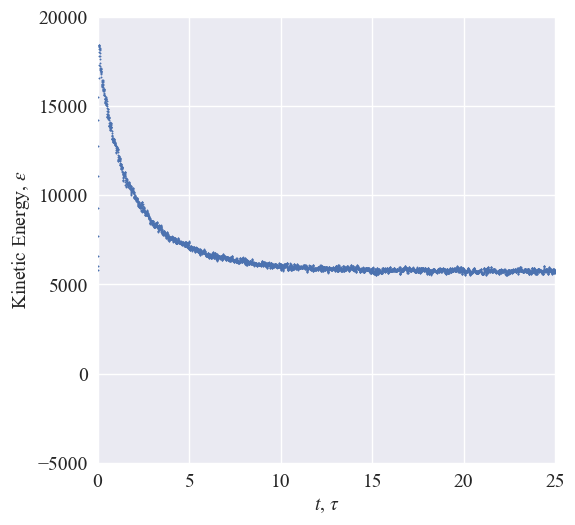

In [23]:
plt.scatter(
    times,
    system_parameters['system_kinetic_energy'],
    s=1,
);
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Kinetic Energy, $\epsilon$');

plt.xlim(
    left=0,
    right=25,
);
plt.ylim(
    bottom=-5000,
    top=20000,
);
save_plot(f'kinetic_energy_{plot_filename_postfix}.png')

#### Зависимость потенциальной энергии системы от времени

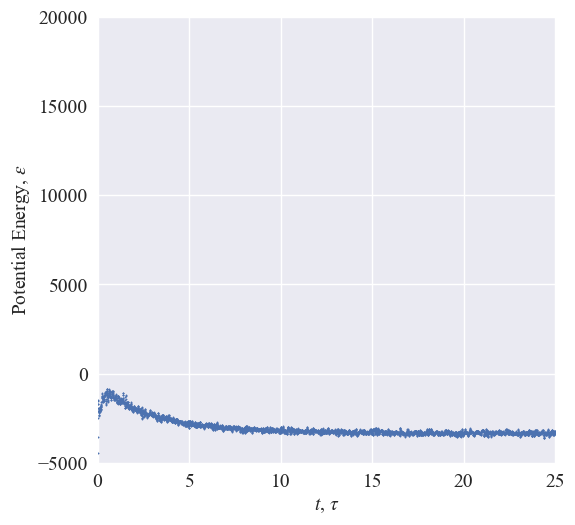

In [24]:
plt.scatter(
    times,
    system_parameters['potential_energy'],
    s=1,
);
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Potential Energy, $\epsilon$');

plt.xlim(
    left=0,
    right=25,
);
plt.ylim(
    bottom=-5000,
    top=20000,
);
save_plot(f'potential_energy_{plot_filename_postfix}.png')

#### Зависимость полной энергии системы от времени

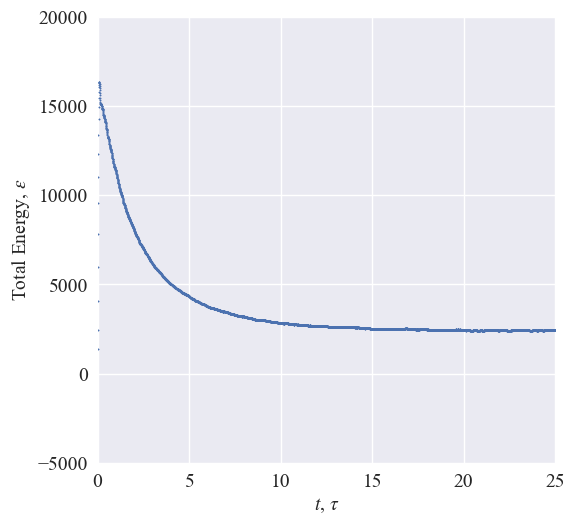

In [25]:
plt.scatter(
    times,
    system_parameters['total_energy'],
    s=1,
);
plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Total Energy, $\epsilon$');

plt.xlim(
    left=0,
    right=25,
);
plt.ylim(
    bottom=-5000,
    top=20000,
);
save_plot(f'total_energy_{plot_filename_postfix}.png')

#### Энергии на одном графике

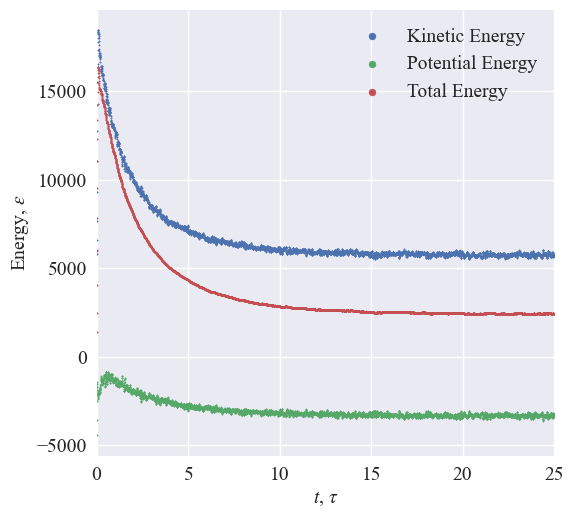

In [26]:
plt.scatter(
    times,
    system_parameters['system_kinetic_energy'],
    s=1,
    label='Kinetic Energy',
);
plt.scatter(
    times,
    system_parameters['potential_energy'],
    s=1,
    label='Potential Energy',
);
plt.scatter(
    times,
    system_parameters['total_energy'],
    s=1,
    label='Total Energy',
);

plt.xlabel(r'$t$, $\tau$');
plt.ylabel(r'Energy, $\epsilon$');
plt.legend(markerscale=5);

plt.xlim(
    left=0,
    right=25,
);
plt.ylim(
#     bottom=-10000,
#     top=6000,
);
save_plot(f'all_energies_{plot_filename_postfix}.png')